In [46]:
import xgboost as xgb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

# 熊野くん作
import sys
import os
sys.path.append(os.path.join(os.path.dirname("."), '../Script'))
import load_npy as ln

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [47]:
#nums-----------------------------------------------
T = 5
Fr = 100
N_F = Fr/2
FREQ = np.linspace(0, N_F, (T*Fr)//2)

In [48]:
parentpath = "../Data/センサ別npyファイル"
ld = ln.Load(parentpath)

In [33]:
pos = "Hand"
tlabel_tdata = ld.train_load(pos, "Label")
glacc_tdata = ld.train_load(pos, "GLAcc")
t_walk_glacc = glacc_tdata[np.where(tlabel_tdata[:,0] == 2)[0]]
t_run_glacc = glacc_tdata[np.where(tlabel_tdata[:,0] == 3)[0]]
t_bike_glacc = glacc_tdata[np.where(tlabel_tdata[:,0] == 4)[0]]

In [34]:
label_vdata = ld.val_load(pos, "Label")
glacc_vdata = ld.val_load(pos, "GLAcc")
v_walk_glacc = glacc_tdata[np.where(label_vdata[:,0] == 2)[0]]
v_run_glacc = glacc_tdata[np.where(label_vdata[:,0] == 3)[0]]
v_bike_glacc = glacc_tdata[np.where(label_vdata[:,0] == 4)[0]]

In [35]:
#class and functions for map()---------------------------------------
class Calc():
    def dv_average(self, x,y):
        x_dv = self.calc_dv(x)
        y_dv = self.calc_dv(y)
        xy = np.sqrt(np.square(x_dv) + np.square(y_dv))
        average_data = np.average(xy)
        return average_data
    def calc_dv(self, num_data):
        pre_num = np.delete(num_data,-1)
        post_num = np.delete(num_data,0)
        dv = (pre_num + post_num) * (1/Fr) * (1/2)
        return dv
c = Calc()

In [36]:
t_walk = np.array(list(map(c.dv_average, t_walk_glacc[:,:,0], t_walk_glacc[:,:,1])))
t_run = np.array(list(map(c.dv_average, t_run_glacc[:,:,0], t_run_glacc[:,:,1])))
t_bike = np.array(list(map(c.dv_average, t_bike_glacc[:,:,0], t_bike_glacc[:,:,1])))

In [37]:
v_walk = np.array(list(map(c.dv_average, v_walk_glacc[:,:,0], v_walk_glacc[:,:,1])))
v_run = np.array(list(map(c.dv_average, v_run_glacc[:,:,0], v_run_glacc[:,:,1])))
v_bike = np.array(list(map(c.dv_average, v_bike_glacc[:,:,0], v_bike_glacc[:,:,1])))

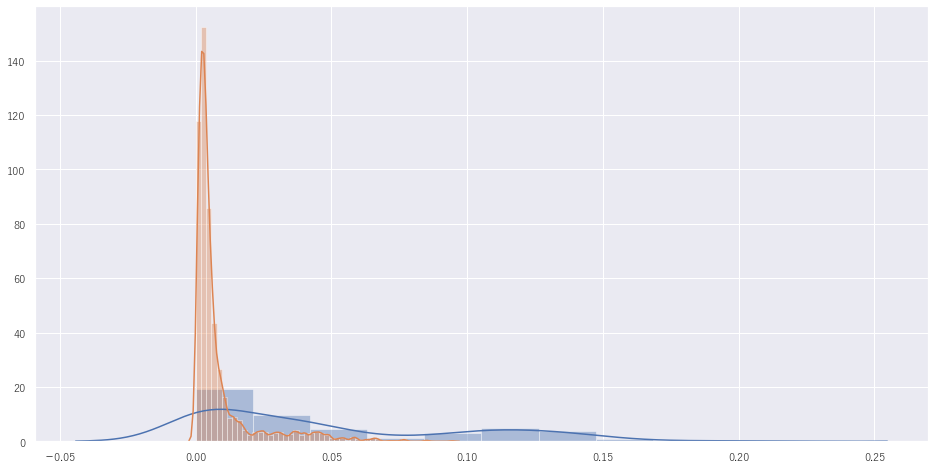

In [45]:
plt.figure(figsize=(16, 8))
sns.distplot(v_run.reshape([-1, 1]), label='train_bike')
sns.distplot(v_bike.reshape([-1, 1]), label='val_bike')
